In [1]:
import gui
import SimpleITK as sitk
from skimage import io
import torch
import torch.nn.functional as F

OUTPUT_DIR = '.'
img1 = sitk.ReadImage('fixed_best.nii')
img2 = sitk.ReadImage('moving_best.nii')
img3 = sitk.ReadImage('warp_best.nii')

In [2]:
img1 = torch.from_numpy(sitk.GetArrayFromImage(img1)).unsqueeze(0).unsqueeze(0)
img1 = F.interpolate(img1,scale_factor=(2.5,1,1),mode = 'trilinear')
img1 = img1.squeeze(0).squeeze(0).numpy()
img1 = sitk.GetImageFromArray(img1)

img2 = torch.from_numpy(sitk.GetArrayFromImage(img2)).unsqueeze(0).unsqueeze(0)
img2 = F.interpolate(img2,scale_factor=(2.5,1,1),mode = 'trilinear')
img2 = img2.squeeze(0).squeeze(0).numpy()
img2 = sitk.GetImageFromArray(img2)

img3 = torch.from_numpy(sitk.GetArrayFromImage(img3)).unsqueeze(0).unsqueeze(0)
img3 = F.interpolate(img3,scale_factor=(2.5,1,1),mode = 'trilinear')
img3 = img3.squeeze(0).squeeze(0).numpy()
img3 = sitk.GetImageFromArray(img3)

C:\Users\dell\.conda\envs\pytorch\lib\site-packages\torch\nn\functional.py:3454: UserWarning: Default upsampling behavior when mode=trilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(
C:\Users\dell\.conda\envs\pytorch\lib\site-packages\torch\nn\functional.py:3502: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(


In [3]:
img1_255 = sitk.Cast(sitk.IntensityWindowing(img1, windowMinimum=0, windowMaximum=0.38,
                                             outputMinimum=0.0, outputMaximum=255.0), sitk.sitkUInt8)
img2_255 = sitk.Cast(sitk.IntensityWindowing(img2, windowMinimum=0, windowMaximum=0.38,
                                             outputMinimum=0.0, outputMaximum=255.0), sitk.sitkUInt8)
img3_255 = sitk.Cast(sitk.IntensityWindowing(img3, windowMinimum=0, windowMaximum=0.38,
                                             outputMinimum=0.0, outputMaximum=255.0), sitk.sitkUInt8)

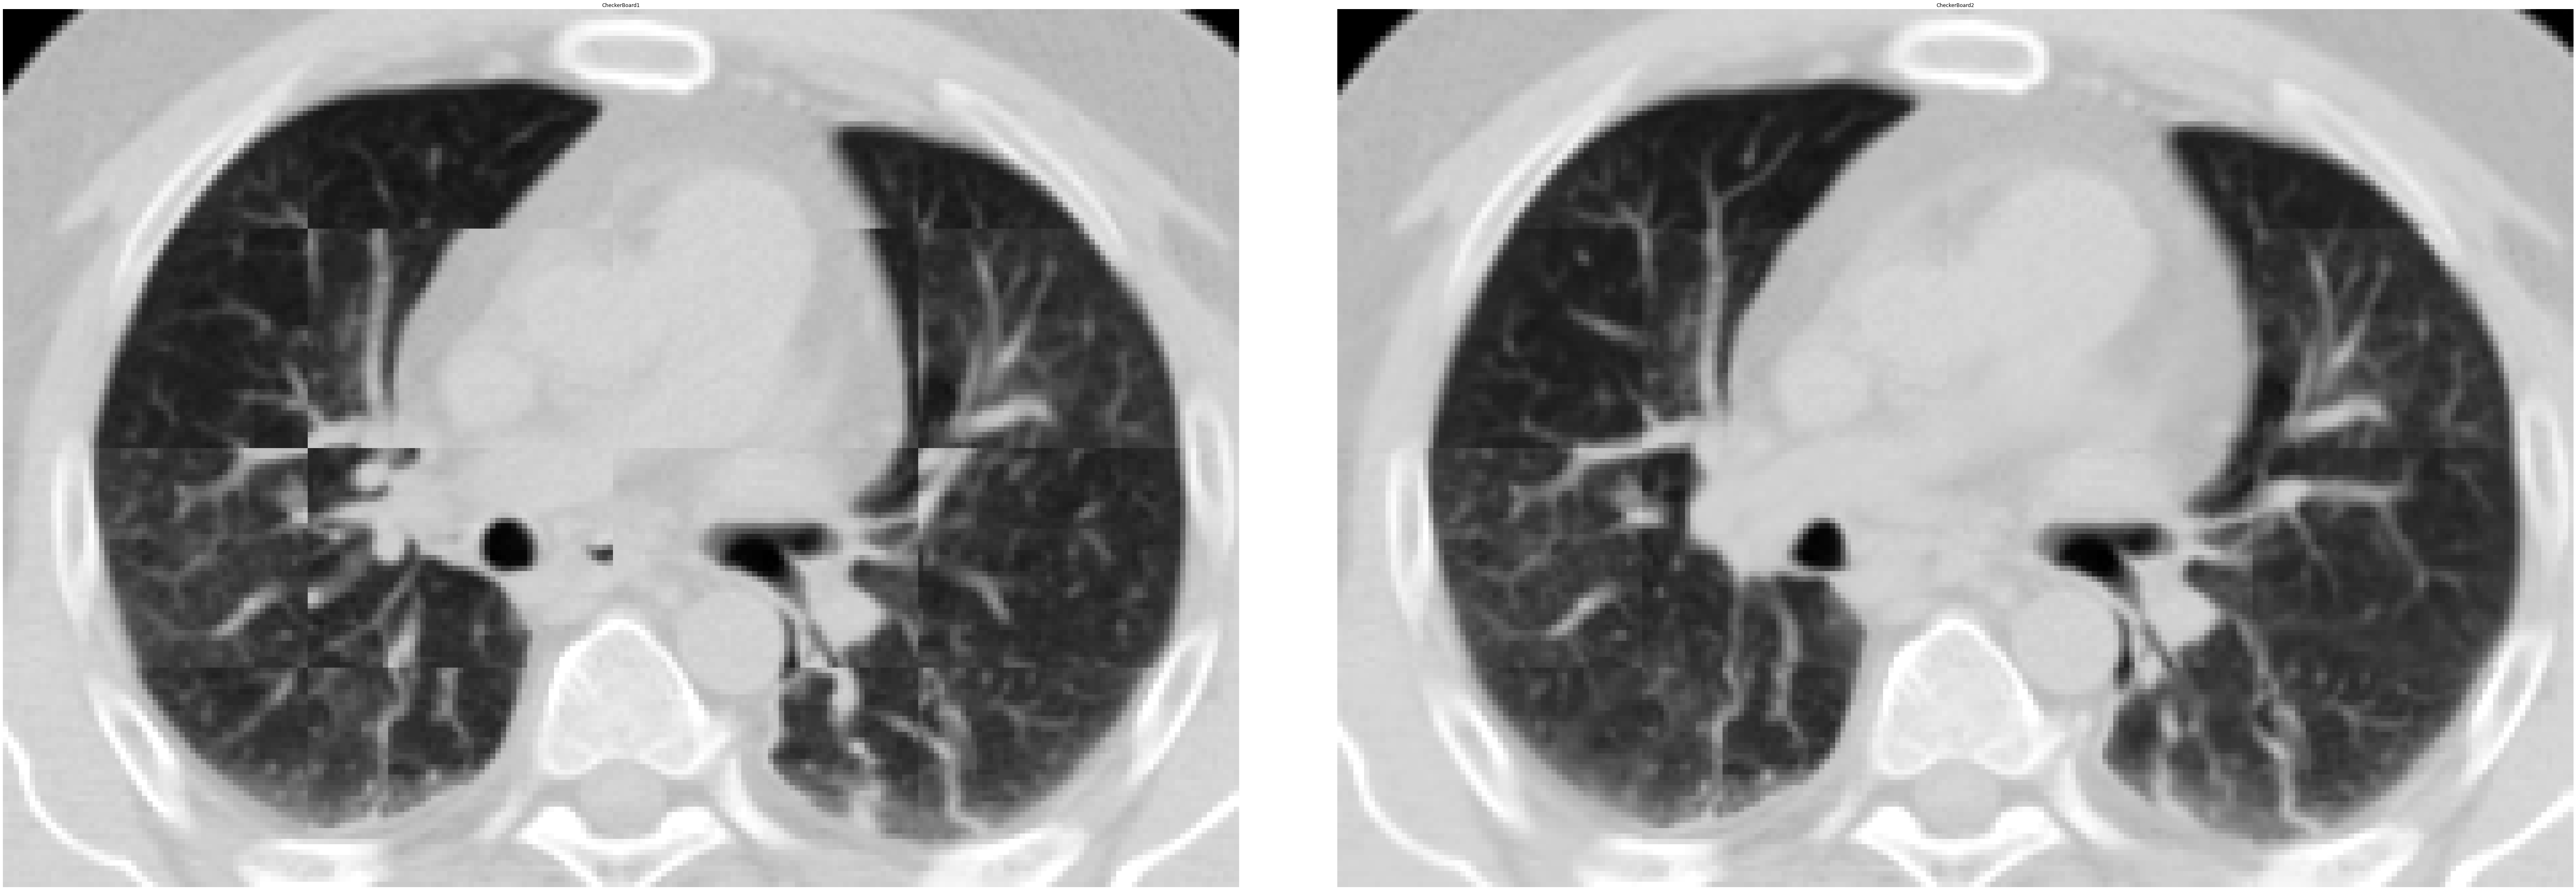

In [4]:
gui.MultiImageDisplay(image_list = [sitk.CheckerBoard(img1_255, img2_255, [4,4,4]),
                                    sitk.CheckerBoard(img1_255, img3_255, [4,4,4])],
                      title_list= ['CheckerBoard1', 'CheckerBoard2'],
                      figure_size=(90,30));

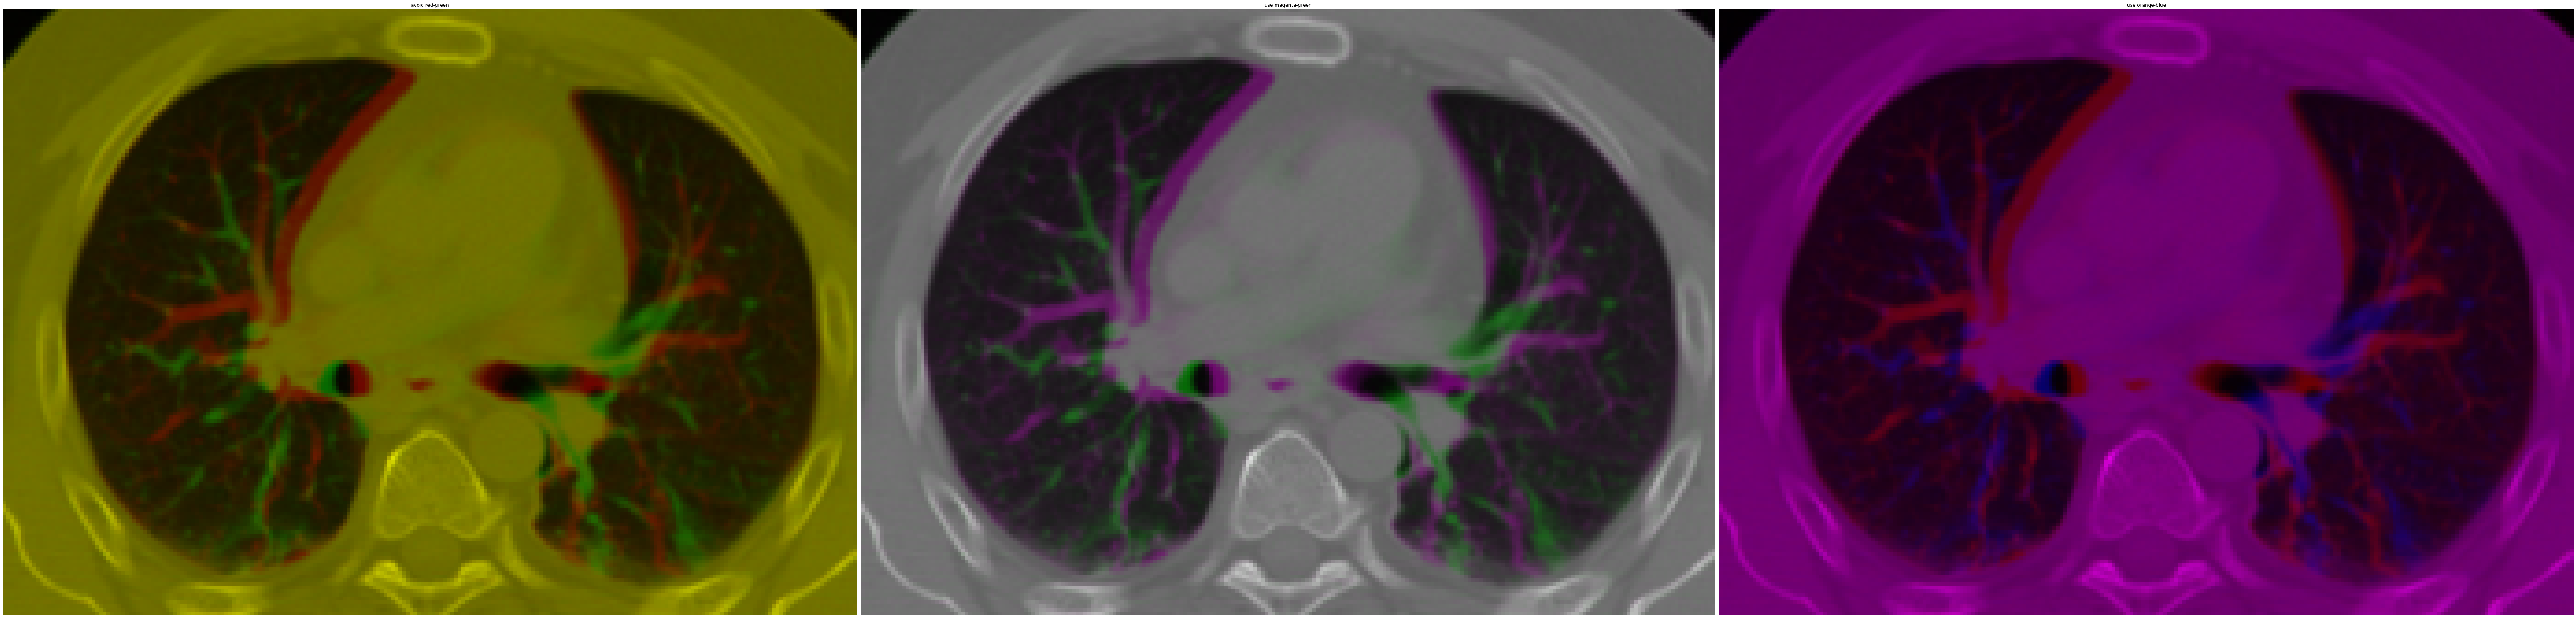

In [5]:
zeros = sitk.Image(img1_255.GetSize(), img1_255.GetPixelID())
zeros.CopyInformation(img1_255)

gui.MultiImageDisplay(image_list = [sitk.Cast(sitk.Compose(img1_255, img2_255, zeros), sitk.sitkVectorUInt8),
                                    sitk.Cast(sitk.Compose(img1_255, img2_255, img1_255), sitk.sitkVectorUInt8),
                                   sitk.Cast(sitk.Compose(img1_255, 0.5*img1_255+0.5*img2_255, img2_255), sitk.sitkVectorUInt8)],
                      title_list= ['avoid red-green', 'use magenta-green', 'use orange-blue'],
                      figure_size=(90,30));

In [6]:
i = sitk.Cast(sitk.Compose(img1_255, img2_255, img1_255), sitk.sitkVectorUInt8)
a = sitk.GetArrayFromImage(i)

In [7]:
io.imsave('1.png',a[:,80,:])